In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# matplotlib

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df=df[df['species'] != 'setosa']

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df['species'] = df['species'].map({'versicolor':0, 'virginica':1})

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


##### split dataset into dependent and independent data

In [11]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [12]:
x

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [16]:
classifier

LogisticRegression()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameter = {'penalty':['l1','l2','elasticnet'] , 'C':[0,20,20,50]}

In [19]:
classifier_regression = GridSearchCV(classifier , param_grid = parameter  , scoring='accuracy', cv = 5 )

In [20]:
classifier_regression.fit(X_train, y_train)

C:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 20, 20, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [21]:
print(classifier_regression.best_params_)

{'C': 20, 'penalty': 'l2'}


In [22]:
print(classifier_regression.best_score_)

0.9714285714285715


##### prediction 

In [23]:
predicted = classifier_regression.predict(X_test)

In [24]:
predicted

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score , classification_report

In [26]:
score = accuracy_score(predicted , y_test)

In [27]:
score

0.9393939393939394

In [28]:
logist = classifier.fit(X_train , y_train)

In [29]:
predY=logist.predict(X_test)

In [30]:
predY

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [31]:
score1 = accuracy_score(predY , y_test)

In [32]:
score1

0.9393939393939394

C:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


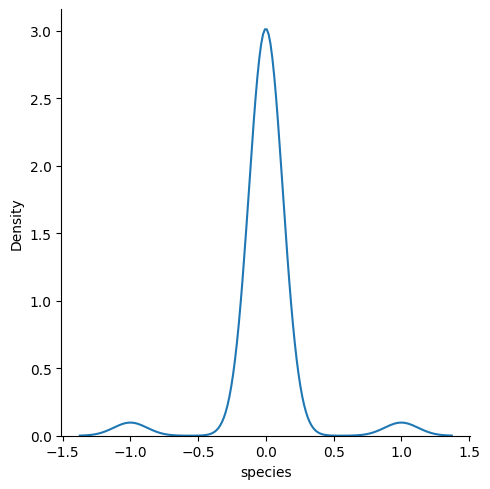

In [33]:
sns.displot(predY-y_test , kind ='kde')

In [45]:
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

ValueError: regplot inputs must be 1d